<a href="https://colab.research.google.com/github/YajuluRenduchintala/OIBSIP/blob/main/Taxi_Fare_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Dataset

In [ ]:
# from google.colab import drive

# # Mounting Google Drive
# drive.mount('/content/drive')

# # Path to the CSV file on Google Drive
# file_path = '/content/drive/MyDrive/TaxiFare (2) (1).csv'

# # Reading the CSV file into a pandas DataFrame
# data = pd.read_csv(file_path)

#Loading from the Github
url='https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv'
df=pd.read_csv(url)

In [ ]:
data.head() #First five rows of the dataset

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
data.describe(include = "all")

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,3597,NaN,49555,NaN,NaN,NaN,NaN,NaN
top,26:00.0,NaN,2011-09-03 01:30:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,457,NaN,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.364171,NaN,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,NaN,9.685557,NaN,10.393860,6.224857,10.407570,6.014737,1.289195
min,NaN,-5.000000,NaN,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,NaN,6.000000,NaN,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,NaN,8.500000,NaN,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,NaN,12.500000,NaN,-73.967148,40.767360,-73.963584,40.768167,2.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [ ]:
data.shape

(50000, 8)

#Data Featuring

In [ ]:
data.isnull().sum() #checking for missing values and No null

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [ ]:
data.dropna(axis=0, inplace=True)
np.sum(pd.isnull(data))

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [ ]:
data['date_time_of_pickup'] = pd.to_datetime(data['date_time_of_pickup'])
data.loc[:, 'pickup_hour'] = data['date_time_of_pickup'].dt.hour
data.loc[:, 'pickup_weekday'] = data['date_time_of_pickup'].dt.day_name()
data.loc[:, 'pickup_date'] = data['date_time_of_pickup'].dt.day
data.loc[:, 'pickup_month'] = data['date_time_of_pickup'].dt.month
data.loc[:, 'pickup_day'] = data['date_time_of_pickup'].dt.dayofweek


#Data Visualizing

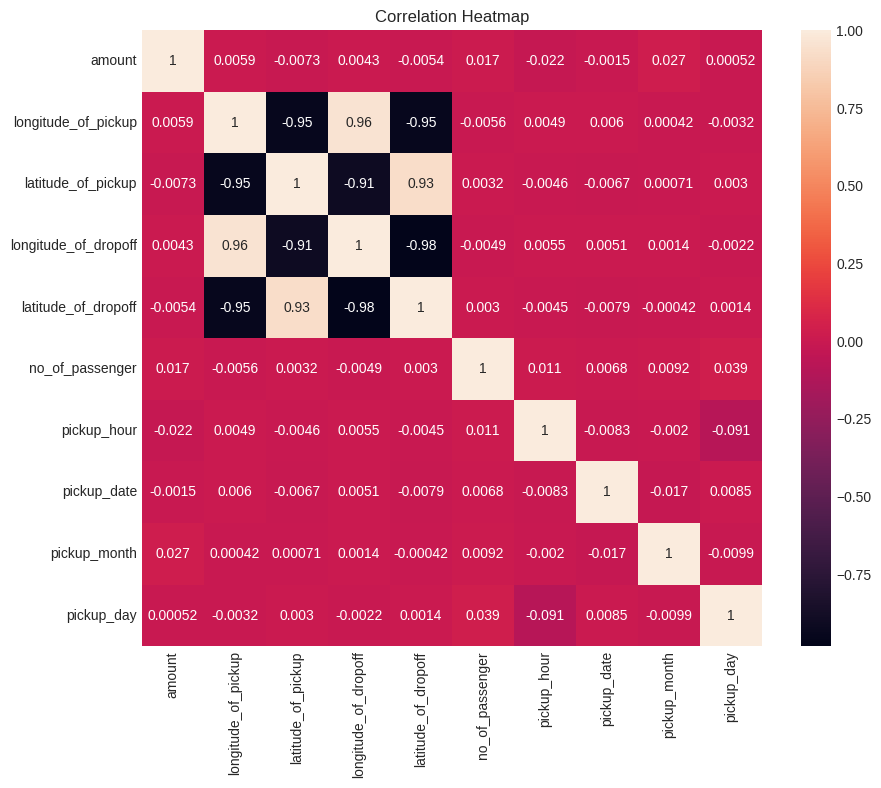

In [ ]:
#Correlation HeatMap
# Exclude the first column as it is unique Id which is not rellated to the Fafre and it is generated dynamically
data_subset = data.iloc[:, 1:]

# Compute the correlation matrix
correlation_matrix = data_subset.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

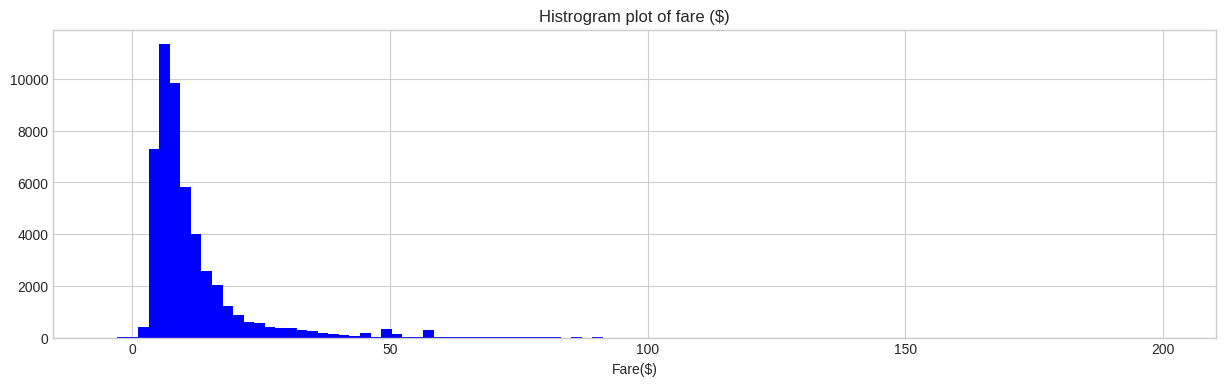

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15, 4))

plt.hist(data['amount'], bins=100, color='blue')
plt.xlabel("Fare($)")
plt.title("Histrogram plot of fare ($)")
plt.show()

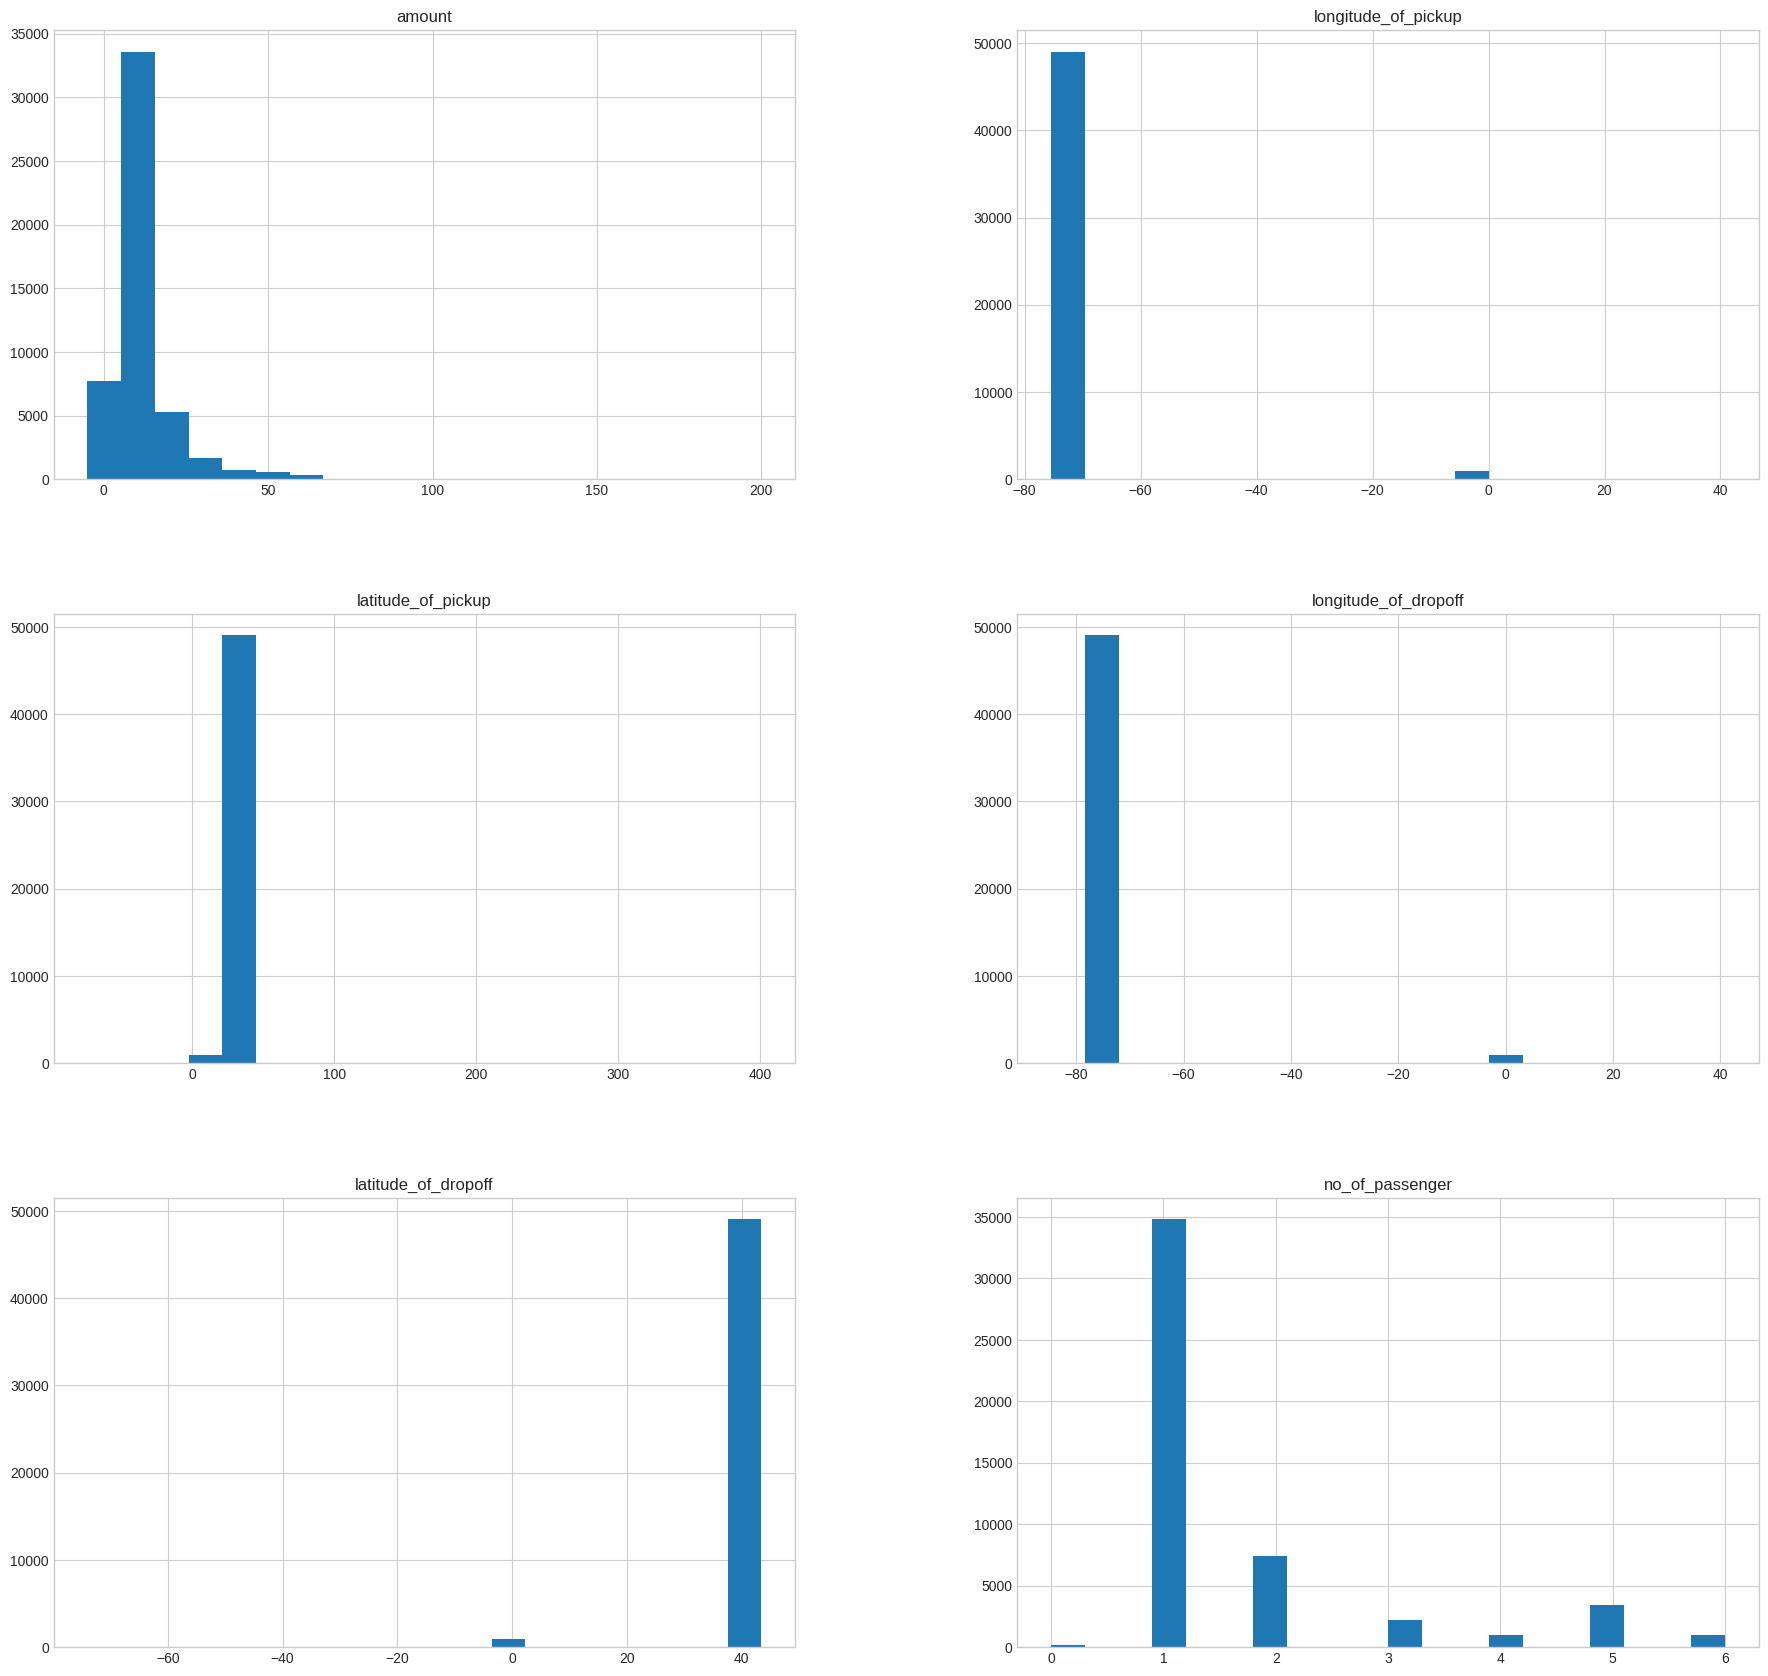

In [ ]:
data.hist(figsize=(22,21), bins=20);

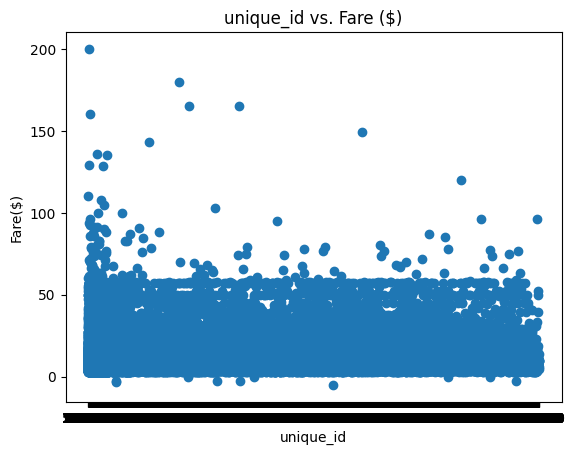

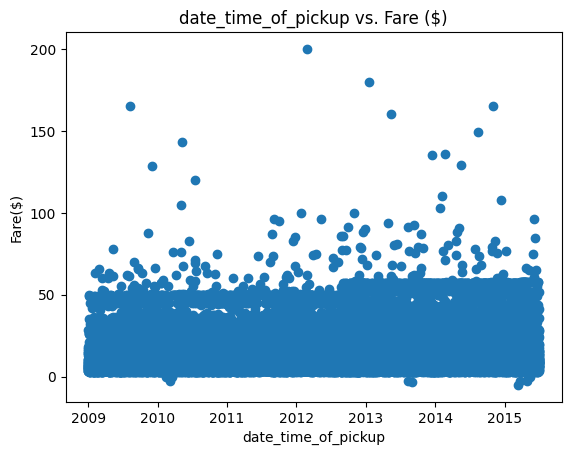

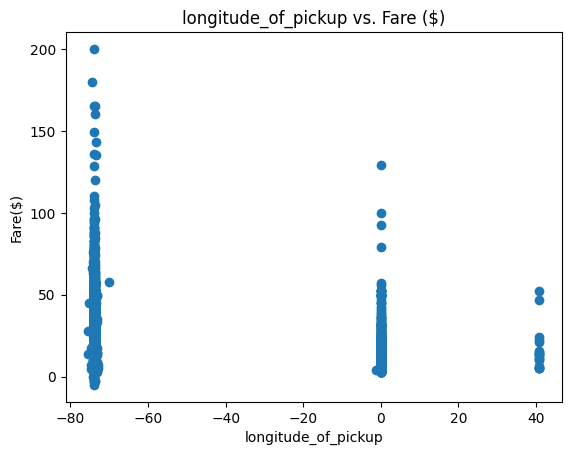

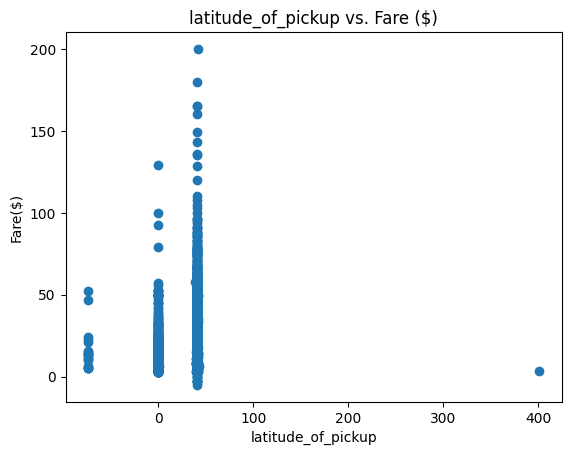

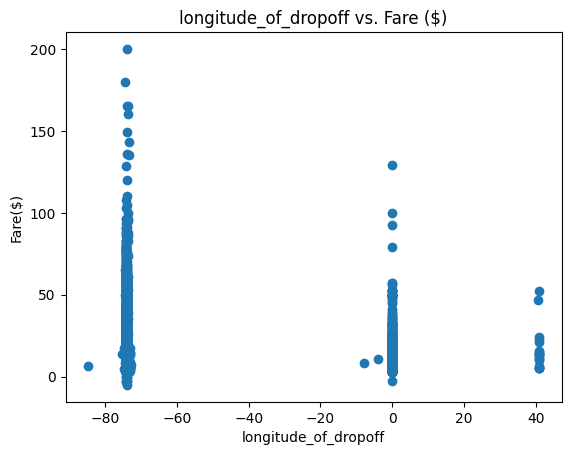

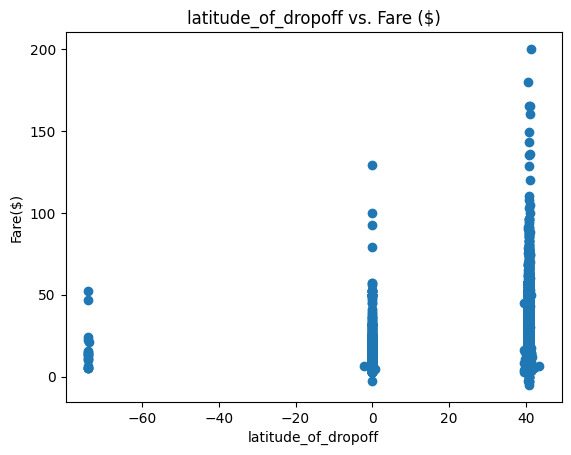

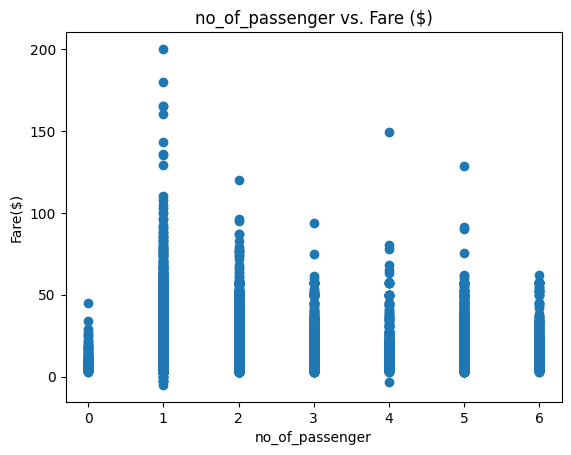

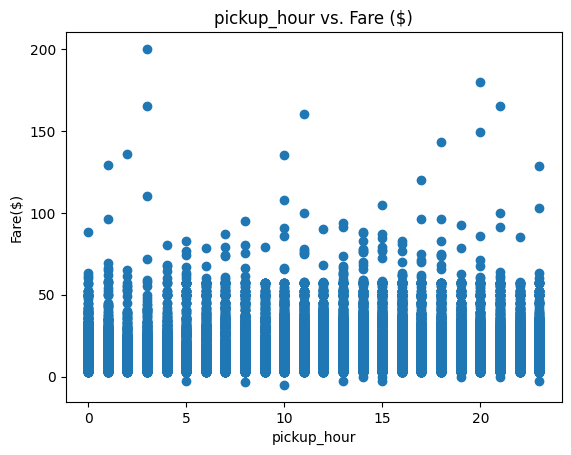

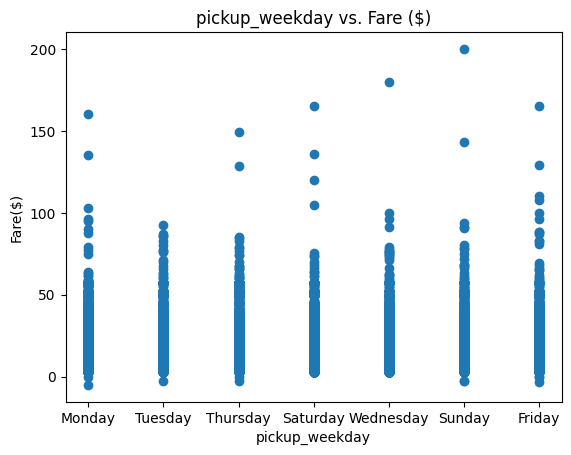

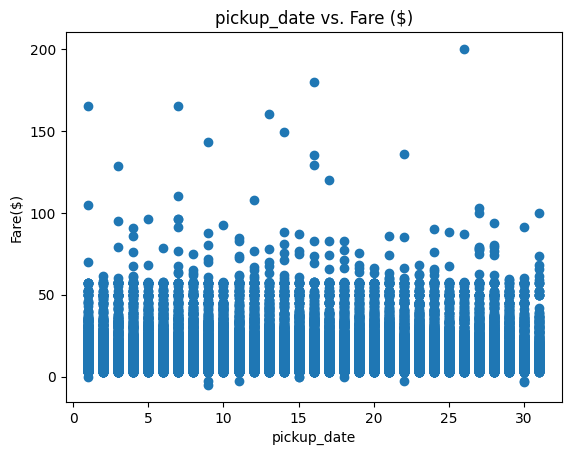

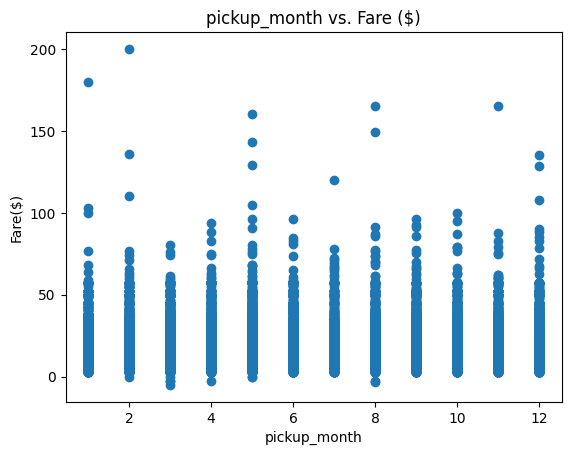

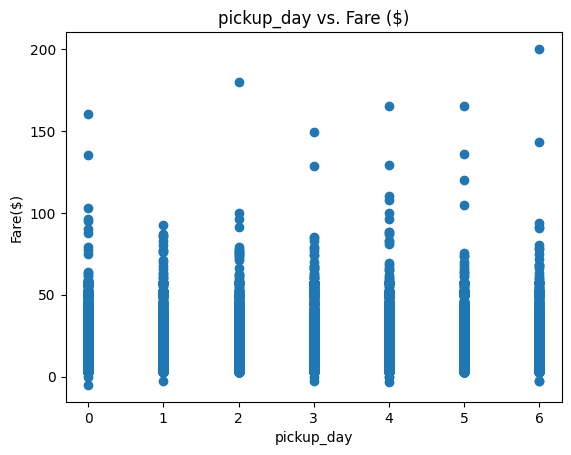

In [ ]:
# Get the column names
columns = data.columns

# Remove the 'h1n1_vaccine' column from the list
columns = [col for col in columns if col != 'amount']

# Plot each column against 'h1n1_vaccine' separately
for col in columns:
    plt.figure()
    plt.scatter(data[col], data['amount'])
    plt.xlabel(col)
    plt.ylabel('Fare($)')
    plt.title(f'{col} vs. Fare ($)')

# Display the plots
plt.show()

#Model Training

In [ ]:
# Dividing into Independent and Dependent variables
X = data.drop(columns=['amount', 'unique_id', 'date_time_of_pickup'])
y = data['amount'].values

In [ ]:
# Encoding categorical variable using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['pickup_weekday']
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(X[categorical_columns])

# Dropping the original categorical columns from X and concatenating the encoded features
X_encoded = pd.concat([X.drop(columns=categorical_columns), pd.DataFrame(encoded_features)], axis=1).values


In [ ]:
# Dividing into Train and Test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=1, test_size=0.2)

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train)
linear_pred = linear.predict(X_test)

In [ ]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(random_state=0)
DTR.fit(X_train,y_train)
y_DTR = DTR.predict(X_test)

In [ ]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=15,random_state=1)
RFR.fit(X_train,y_train)
y_RFR = RFR.predict(X_test)

#Model Visualization

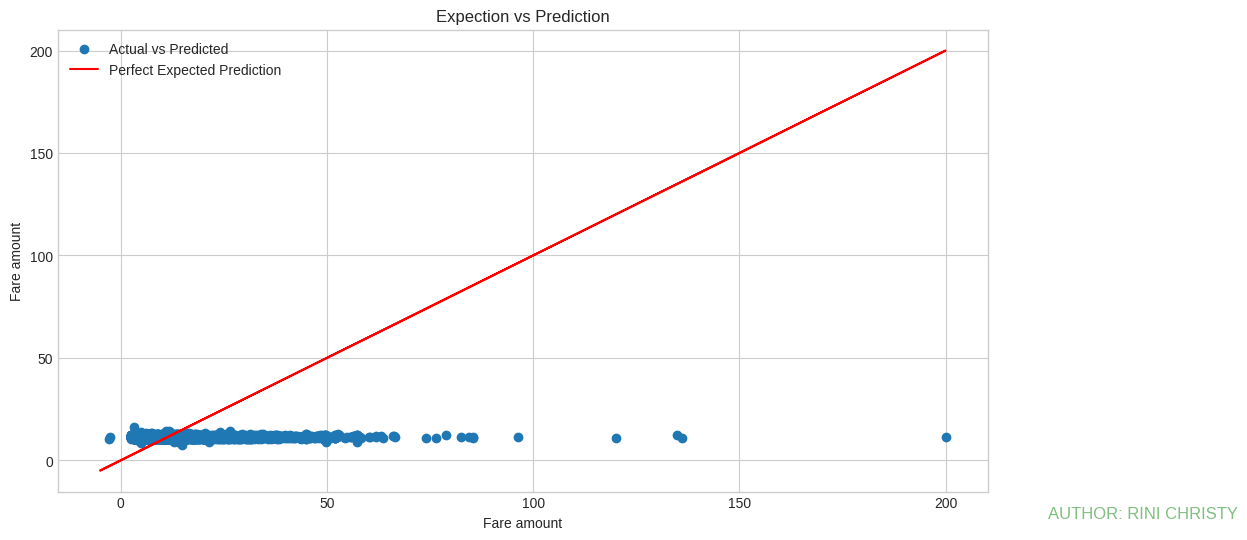

In [ ]:
# Linear Regression Visualization
f, ax = plt.subplots(figsize=(12,6),dpi=100);
plt.scatter(y_test, linear_pred, label="Actual vs Predicted")
# Perfect predictions
plt.xlabel('Fare amount')
plt.ylabel('Fare amount')
plt.title('Expection vs Prediction (Linear Regression)')
plt.plot(y,y,'r', label="Perfect Expected Prediction")
plt.legend()
f.text(0.95, 0.06, 'AUTHOR: RINI CHRISTY',
         fontsize=12, color='green',
         ha='left', va='bottom', alpha=0.5);
plt.show()

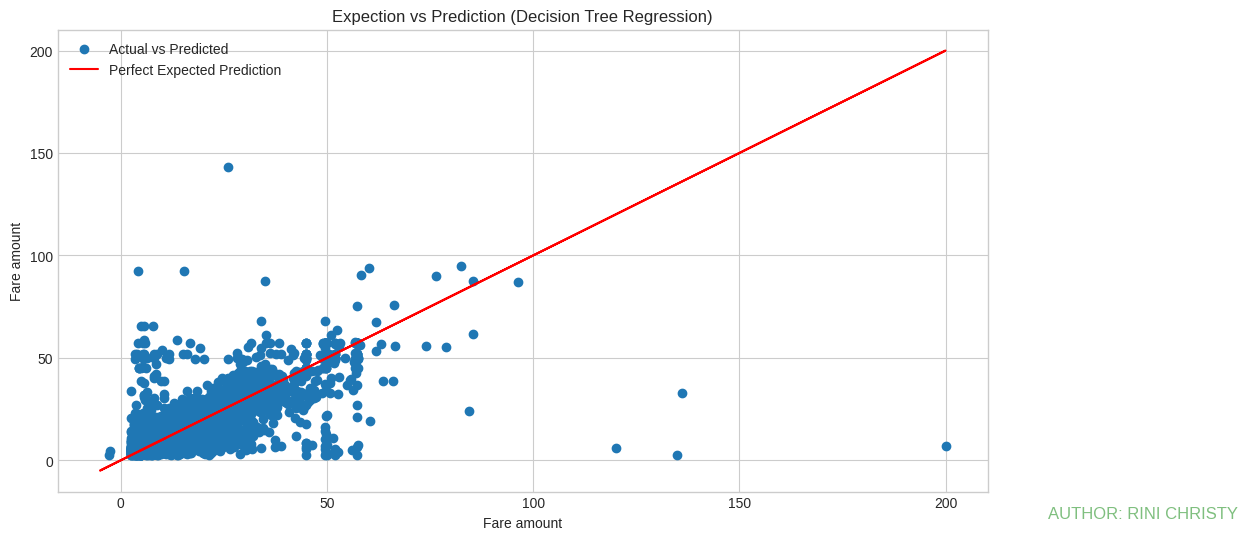

In [ ]:
# Decision Tree Regression Visualization
f, ax = plt.subplots(figsize=(12,6),dpi=100);
plt.scatter(y_test, y_DTR, label="Actual vs Predicted")
# Perfect predictions
plt.xlabel('Fare amount')
plt.ylabel('Fare amount')
plt.title('Expection vs Prediction (Decision Tree Regression)')
plt.plot(y,y,'r', label="Perfect Expected Prediction")
plt.legend()
f.text(0.95, 0.06, 'AUTHOR: RINI CHRISTY',
         fontsize=12, color='green',
         ha='left', va='bottom', alpha=0.5);
plt.show()

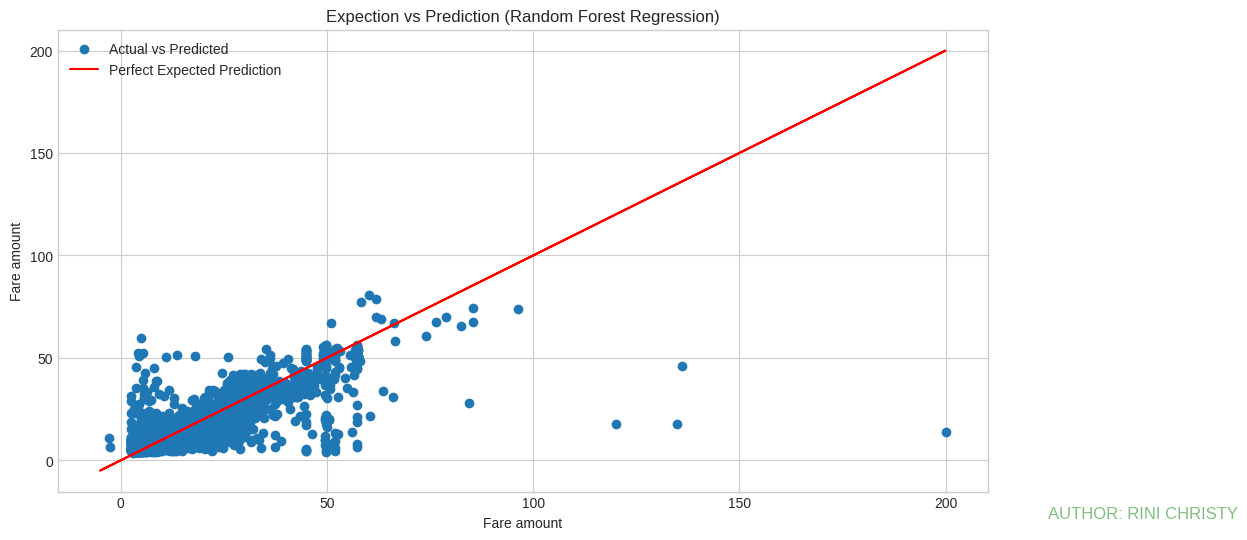

In [ ]:
# Random Forest Regression Visualization
f, ax = plt.subplots(figsize=(12,6),dpi=100);
plt.scatter(y_test, y_RFR, label="Actual vs Predicted")
# Perfect predictions
plt.xlabel('Fare amount')
plt.ylabel('Fare amount')
plt.title('Expection vs Prediction (Random Forest Regression)')
plt.plot(y,y,'r', label="Perfect Expected Prediction")
plt.legend()
f.text(0.95, 0.06, 'AUTHOR: RINI CHRISTY',
         fontsize=12, color='green',
         ha='left', va='bottom', alpha=0.5);
plt.show()

#Model Evaluation

In [ ]:
#Evaluating Linear Regression
from sklearn.metrics import r2_score
print(r2_score(y_test,linear_pred))

-0.0008718859318903593


In [ ]:
#Evaluating Decision Tree Regression
print(r2_score(y_test,y_DTR))

0.5306960091499124


In [ ]:
#Evaluating Random Forest Regression
print(r2_score(y_test,y_RFR))

0.7124912961867994


In [ ]:
#Therefore based on the r2_scores of the above models "Random Forest Regression" is the best model for the given dataset